In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv(r"C:\Users\Nalini\Desktop\Learning (Udemy)\TF basics from Py for Data Science\TensorFlow_FILES\DATA\cancer_classification.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

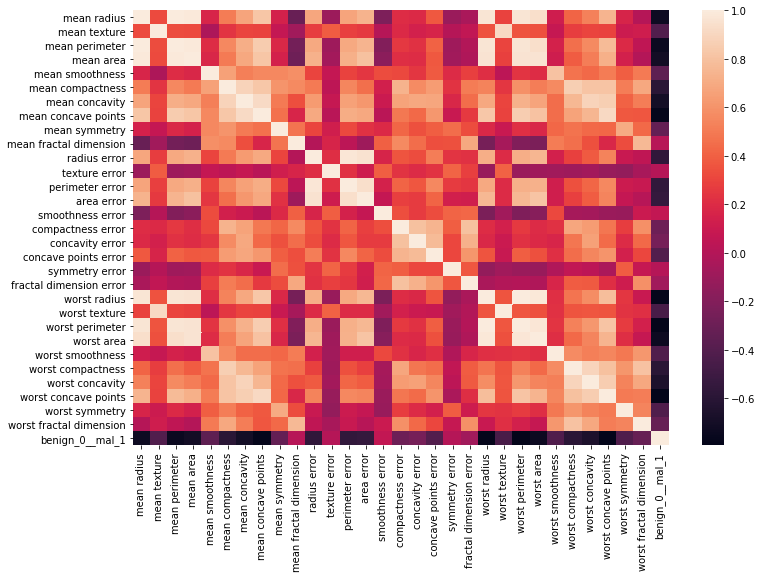

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [7]:
X = df.drop('benign_0__mal_1', axis= 1)
y = df['benign_0__mal_1']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
scale = StandardScaler()

In [10]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [11]:
model = SVC()

In [12]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.98      0.99      0.99       105

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [14]:
print(confusion_matrix(y_test, y_pred))

[[ 64   2]
 [  1 104]]


## Keras-TF implementation

In [15]:
model = Sequential()

model.add(Dense(units = X_train.shape[1], activation = 'relu'))
model.add(Dense(units = X_train.shape[1], activation = 'relu'))
model.add(Dense(units = X_train.shape[1], activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [16]:
model.fit(X_train, y_train, 
          epochs= 300, 
          validation_data=(X_test, y_test), 
          verbose=1)

Epoch 1/300
13/13 [==============================] - 1s 90ms/step - loss: 0.6445 - val_loss: 0.5773
Epoch 2/300
13/13 [==============================] - 0s 25ms/step - loss: 0.5145 - val_loss: 0.4637
Epoch 3/300
13/13 [==============================] - 0s 25ms/step - loss: 0.3874 - val_loss: 0.3547
Epoch 4/300
13/13 [==============================] - 0s 28ms/step - loss: 0.2670 - val_loss: 0.2628
Epoch 5/300
13/13 [==============================] - 0s 19ms/step - loss: 0.1720 - val_loss: 0.2101
Epoch 6/300
13/13 [==============================] - 0s 36ms/step - loss: 0.1193 - val_loss: 0.1878
Epoch 7/300
13/13 [==============================] - 0s 24ms/step - loss: 0.0958 - val_loss: 0.1747
Epoch 8/300
13/13 [==============================] - 0s 23ms/step - loss: 0.0815 - val_loss: 0.1619
Epoch 9/300
13/13 [==============================] - 0s 21ms/step - loss: 0.0718 - val_loss: 0.1522
Epoch 10/300
13/13 [==============================] - 0s 15ms/step - loss: 0.0645 - val_loss: 0.1426

13/13 [==============================] - 0s 9ms/step - loss: 5.1845e-04 - val_loss: 0.2954
Epoch 82/300
13/13 [==============================] - 0s 7ms/step - loss: 4.9367e-04 - val_loss: 0.2971
Epoch 83/300
13/13 [==============================] - 0s 7ms/step - loss: 4.7923e-04 - val_loss: 0.2988
Epoch 84/300
13/13 [==============================] - 0s 7ms/step - loss: 4.5968e-04 - val_loss: 0.2996
Epoch 85/300
13/13 [==============================] - 0s 7ms/step - loss: 4.6407e-04 - val_loss: 0.3027
Epoch 86/300
13/13 [==============================] - 0s 7ms/step - loss: 4.2966e-04 - val_loss: 0.3043
Epoch 87/300
13/13 [==============================] - 0s 7ms/step - loss: 4.1381e-04 - val_loss: 0.3055
Epoch 88/300
13/13 [==============================] - 0s 7ms/step - loss: 3.9490e-04 - val_loss: 0.3071
Epoch 89/300
13/13 [==============================] - 0s 9ms/step - loss: 3.8396e-04 - val_loss: 0.3087
Epoch 90/300
13/13 [==============================] - 0s 7ms/step - loss: 3.6

13/13 [==============================] - 0s 13ms/step - loss: 5.8274e-05 - val_loss: 0.3954
Epoch 160/300
13/13 [==============================] - 0s 12ms/step - loss: 5.6840e-05 - val_loss: 0.3958
Epoch 161/300
13/13 [==============================] - 0s 12ms/step - loss: 5.5579e-05 - val_loss: 0.3973
Epoch 162/300
13/13 [==============================] - 0s 10ms/step - loss: 5.4833e-05 - val_loss: 0.3987
Epoch 163/300
13/13 [==============================] - 0s 12ms/step - loss: 5.3475e-05 - val_loss: 0.3998
Epoch 164/300
13/13 [==============================] - 0s 12ms/step - loss: 5.2150e-05 - val_loss: 0.4007
Epoch 165/300
13/13 [==============================] - 0s 12ms/step - loss: 5.1197e-05 - val_loss: 0.4017
Epoch 166/300
13/13 [==============================] - 0s 12ms/step - loss: 5.0391e-05 - val_loss: 0.4026
Epoch 167/300
13/13 [==============================] - 0s 12ms/step - loss: 4.9197e-05 - val_loss: 0.4038
Epoch 168/300
13/13 [==============================] - 0s 12

Epoch 237/300
13/13 [==============================] - 0s 7ms/step - loss: 1.5724e-05 - val_loss: 0.4648
Epoch 238/300
13/13 [==============================] - 0s 7ms/step - loss: 1.5343e-05 - val_loss: 0.4653
Epoch 239/300
13/13 [==============================] - 0s 7ms/step - loss: 1.5264e-05 - val_loss: 0.4662
Epoch 240/300
13/13 [==============================] - 0s 7ms/step - loss: 1.4994e-05 - val_loss: 0.4672
Epoch 241/300
13/13 [==============================] - 0s 8ms/step - loss: 1.4773e-05 - val_loss: 0.4683
Epoch 242/300
13/13 [==============================] - 0s 7ms/step - loss: 1.4509e-05 - val_loss: 0.4690
Epoch 243/300
13/13 [==============================] - 0s 7ms/step - loss: 1.4339e-05 - val_loss: 0.4699
Epoch 244/300
13/13 [==============================] - 0s 7ms/step - loss: 1.4141e-05 - val_loss: 0.4705
Epoch 245/300
13/13 [==============================] - 0s 7ms/step - loss: 1.3960e-05 - val_loss: 0.4713
Epoch 246/300
13/13 [==============================] - 

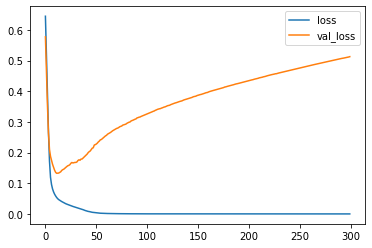

In [17]:
df_loss = pd.DataFrame(model.history.history)

df_loss.plot()

In [18]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## Keras-TF implementation with Earlystopping

In [20]:
model = Sequential()

model.add(Dense(units = X_train.shape[1], activation = 'relu'))
model.add(Dense(units = X_train.shape[1], activation = 'relu'))
model.add(Dense(units = X_train.shape[1], activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [21]:
Early_stopp = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

In [22]:
model.fit(X_train, y_train, 
          epochs= 300, 
          validation_data=(X_test, y_test), 
          verbose=1,
         callbacks= [Early_stopp])

Epoch 1/300
13/13 [==============================] - 0s 20ms/step - loss: 0.6396 - val_loss: 0.5359
Epoch 2/300
13/13 [==============================] - 0s 17ms/step - loss: 0.4620 - val_loss: 0.4083
Epoch 3/300
13/13 [==============================] - 0s 9ms/step - loss: 0.3210 - val_loss: 0.2886
Epoch 4/300
13/13 [==============================] - 0s 9ms/step - loss: 0.2077 - val_loss: 0.2123
Epoch 5/300
13/13 [==============================] - 0s 9ms/step - loss: 0.1406 - val_loss: 0.1736
Epoch 6/300
13/13 [==============================] - 0s 11ms/step - loss: 0.1050 - val_loss: 0.1509
Epoch 7/300
13/13 [==============================] - 0s 11ms/step - loss: 0.0842 - val_loss: 0.1369
Epoch 8/300
13/13 [==============================] - 0s 9ms/step - loss: 0.0716 - val_loss: 0.1274
Epoch 9/300
13/13 [==============================] - 0s 10ms/step - loss: 0.0620 - val_loss: 0.1201
Epoch 10/300
13/13 [==============================] - 0s 10ms/step - loss: 0.0558 - val_loss: 0.1154
Epo

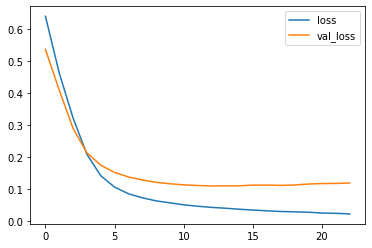

In [23]:
df_loss = pd.DataFrame(model.history.history)

df_loss.plot()

In [24]:
y_pred = model.predict_classes(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        66
           1       0.97      0.96      0.97       105

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [26]:
print(confusion_matrix(y_test, y_pred))

[[ 63   3]
 [  4 101]]
